Logistic Regression은 이름에서 Regression이 들어간 것처럼, 회귀 분석 방법으로 분류 문제에 접근한다. 일반적인 회귀 분석의 목표와 동일하게 종속 변수와 독립 변수 간의 관계를 선형 함수로 나타내어 종속 변수의 발생 확률을 예측하는 분류 기법이다.

# 선형 회귀(Linear Regression)
선형 회귀의 식은 다음과 같다.
$$H(X) = W^TX + b = w_1x_1 + w_2x_2 + \cdots + w_kx_k + b$$
선형 회귀는 독립 변수들과 종속 변수 간의 선형관계를 가정하고 이를 잘 나타내는 회귀계수 $W$를 데이터로부터 추정한다. 선형 회귀는 일반적으로 수치(Continuous) 예측 문제에 사용한다. 분류 모델에 사용할 경우 불가능한 것은 아니지만 예측 결과의 범위가 [$-\infty$, $\infty$]로 [0, 1]의 범위를 넘어가게 된다.

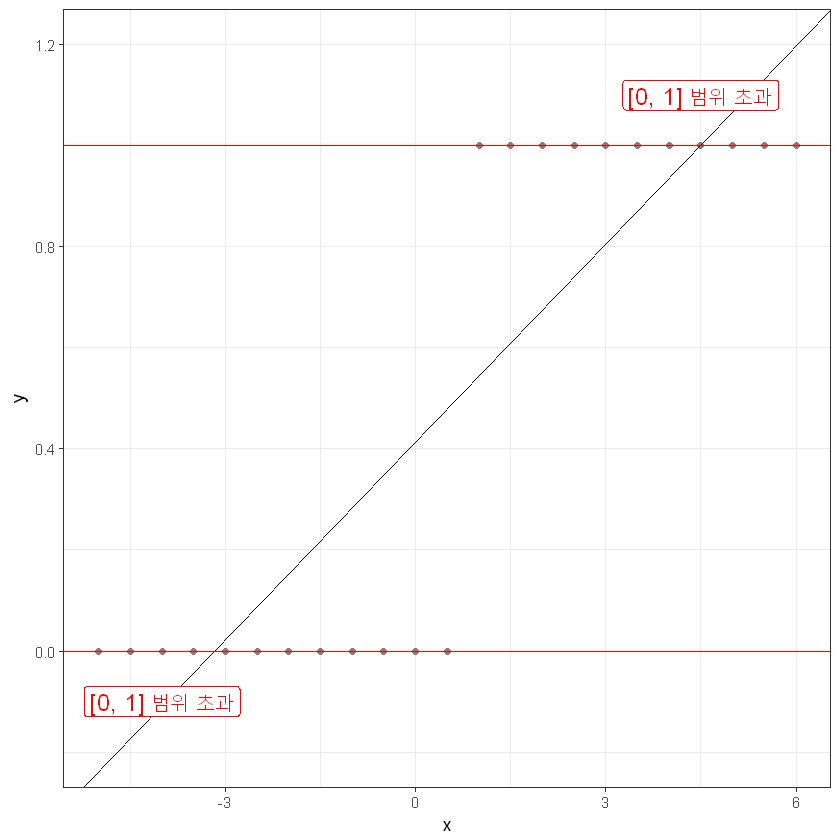

In [55]:
# Load library
library(ggplot2)

# Generate data
x <- seq(-5, 6, 0.5)
y <- c(rep(0, 12), rep(1, 11))
data <- data.frame(x = x, y = y)

# Train Linear Regression
lm.fit <- lm(y ~ x, data)

# Plot setting
options(repr.plot.width=7, repr.plot.height=7)

# Plot
ggplot(data, aes(x, y)) + geom_point(color = "grey50") + 
  geom_abline(slope = lm.fit$coefficients[2], intercept = lm.fit$coefficients[1]) +
  ylim(c(-0.2, 1.2)) +
  geom_label(label = "[0, 1] 범위 초과", x = -4, y = -0.1, col = "red", size = 5) +
  geom_label(label = "[0, 1] 범위 초과", x = 4.5, y = 1.1, col = "red", size = 5) +
  geom_hline(yintercept = 0, col = "red") + geom_hline(yintercept = 1, col = "red") +
  theme_bw()

이러한 문제를 해결하기 위해 결과값인 $H(X)$를 [0, 1] 범위로 갖게 해주는 연결 함수가 필요하다.

# 시그모이드 함수(Sigmoid Function)
이항 분류 문제에 적합한 함수로 시그모이드(Sigmoid) 함수가 있다. 그래프의 모양은 아래와 같이 s자 형태로 x = 0을 중심으로 $-\infty$로 갈수록 0으로 수렴하고 $\infty$로 갈수록 1에 수렴한다. 즉, 모든 $x$값에 대해 [0, 1] 범위의 값을 갖게 해준다.
$$g(z) = \frac{1}{1 + e^{-z}} = \frac{e^z}{1 + e^z}$$

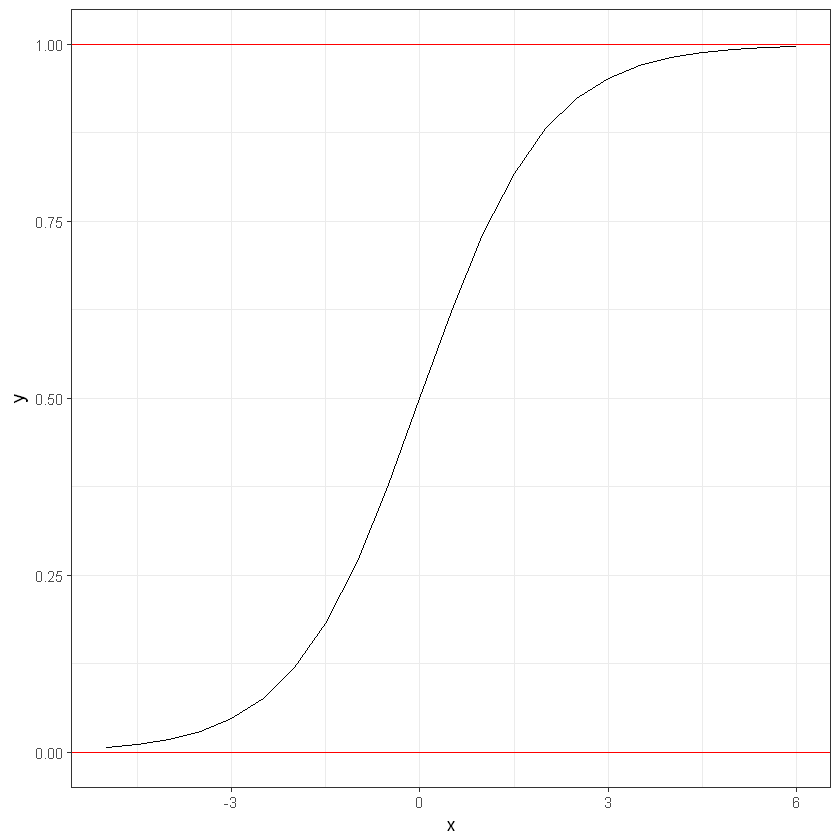

In [14]:
# Generate data
x2 <- seq(-5, 6, 0.5)
y2 <- 1/(1 + exp(-x2)) # Sigmoid function
data2 <- data.frame(x = x2, y = y2)

# Plot
ggplot(data2, aes(x, y)) + geom_line() + 
  geom_hline(yintercept = 0, col = "red") + geom_hline(yintercept = 1, col = "red") + theme_bw()

이 시그모이드 함수 $g(z)$를 사용하여 $H(X) = W^TX + b$를  $[-\infty, \infty]$ 범위에서 [0, 1] 범위로 바꾸어준다.
$$g(z) = g(W^TX + b) = \frac{1}{1 + e^{-(W^TX+b)}}$$

승산(Odds)과 로짓 변환(logit transformation)을 통해 좀 더 자세하게 살펴보자.

## 승산(Odds)
승산(Odds)란 성공 확률 / 실패 확률, 임의의 사건 A가 발생하지 않을 확률 대비 발생할 확률을 나타내고 아래와 같이 표현된다.
$$\text{Odds} = \frac{p(y=1 | x)}{p(y=0 | x)} = \frac{p(y=1|x)}{1-p(y=1|x)} = \frac{p}{1-p}$$

여기서 $p = p(y=1|x)$는 성공 확률을 나타내므로 [0, 1] 사이의 값을 가진다. 따라서 위의 Odds는 [0, $\infty$] 사이의 값을 갖게된다.
$$\text{Odds} = \begin{cases} \infty, & \text{if } p = 1 \\ 0, & \text{if } p = 0 \end{cases}$$

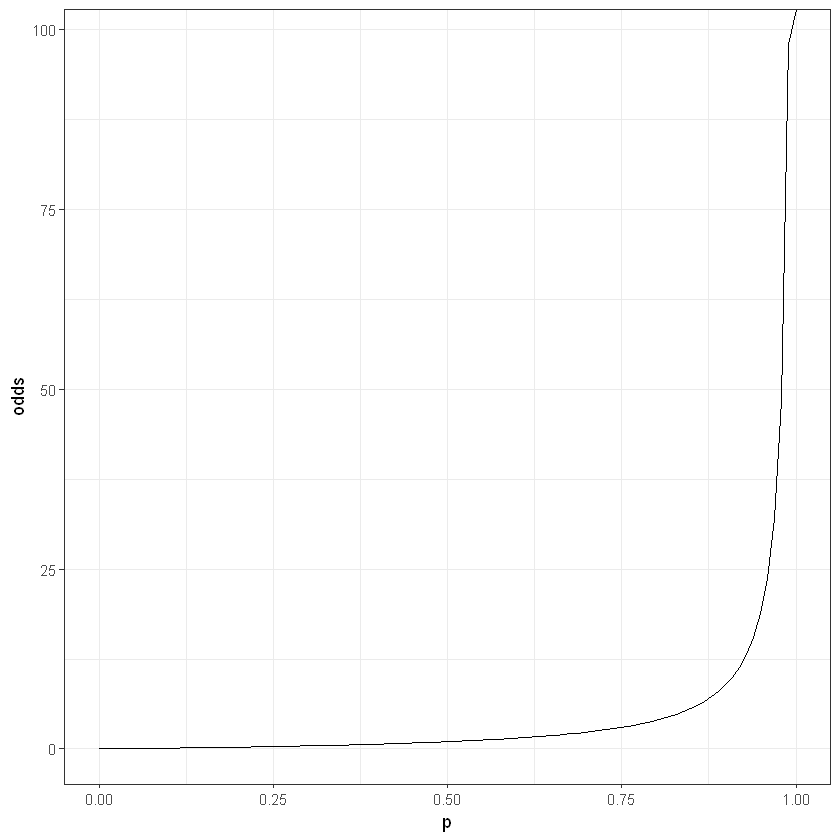

In [24]:
p <- seq(0, 1, length.out = 100)
odds <- p/(1-p)
ggplot(data.frame(p = p, odds = odds), aes(p, odds)) + geom_line() + theme_bw()

## 로짓 변환(logit transformation)
로짓 변환은 승산(Odds)에 log를 취한 값으로 아래와 같이 표현된다.
$$\ln (\text{Odds}) = \ln \frac{p}{1-p}$$

Odds가 [0, $\infty$] 사이의 값을 가지므로 자연 로그를 취한 값의 범위는 [-$\infty$, $\infty$]이 된다.
$$\ln (\text{Odds}) = \begin{cases} \infty, & \text{if } \text{Odds} = \infty \\ -\infty, & \text{if } \text{Odds} = 0\end{cases}$$

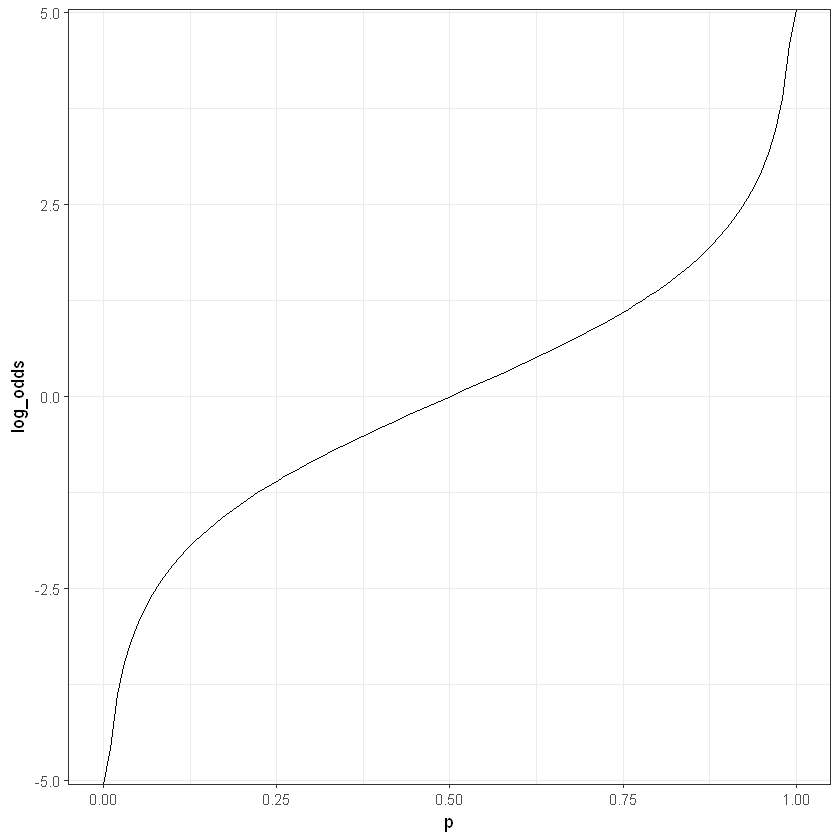

In [27]:
log_odds <- log(odds)
ggplot(data.frame(p = p, log_odds = log_odds), aes(p, log_odds)) + geom_line() + theme_bw()

결국 확률 $p = p(y=1|x)$에 대해 승산 비를 구하고 거기에 자연 로그를 취했더니 [0, 1] 범위에서 [-$\infty$, $\infty$] 범위로 확장되는 함수가 만들어졌다. 이 함수를 이용하여 확률 $p$를 찾아야 하므로, 이 함수를 $p$에 대한 함수로 변환시키면 다음과 같다.

$$\ln \frac{p}{1-p} = W^TX + b$$

$$\frac{p}{1-p} = e^{W^TX + b}$$

$$\frac{1-p}{p} = \frac{1}{p} - 1 = \frac{1}{e^{W^TX + b}}$$

$$\frac{1}{p} = \frac{1}{e^{W^TX + b}} + 1 = \frac{1 + e^{W^TX + b}}{e^{W^TX + b}}$$

$$p = \frac{e^{W^X + b}}{1 + e^{W^TX + b}} = \frac{1}{1 + e^{-(W^TX + b)}}$$

# 회귀 계수 추정
선형 회귀와 마찬가지로 로지스틱 회귀에서도 회귀 계수를 추정하기 위해 경사하강법(Gradient Descent)을 사용한다. 하지만 선형 회귀에서 사용한 비용 함수(cost function)를 사용하게 될 경우, optimization problem이 non-convex가 되어서 Local Optima에 빠질 수 있다.

따라서 로지스틱 회귀에서는 다음과 같은 손실 함수를 사용한다.
$$\text{Loss Function} : L(\hat{y}, y) = -(y\log\hat{y} + (1-y)\log(1-\hat{y}))$$

손실 함수가 작을 수록 좋으므로 실제 값($y$)에 따라 손실 함수가 다음과 같이 변한다.
$$\text{Loss Function} = \begin{cases} -\log \hat{y}, & \text{if } y = 1 \rightarrow \text{가능한 큰 }\hat{y}(=1)\text{을 원함} \\ -\log (1-\hat{y}), & \text{if } y = 0 \rightarrow \text{가능한 작은 }\hat{y}(=0)\text{을 원함} \end{cases}$$

위의 손실 함수는 single training sample에 대한 것이므로, 전체 trianing sample에 대한 비용 함수는 다음과 같다.
$$\text{Cost Function} : J(W, b) = \frac{1}{m} \sum L(\hat{y}, y)$$ 
$$\text{ m = training sample 수}$$

![Logistic Regression Gradient Descent](https://www.dropbox.com/s/v1dbvpozhczoyzn/logistic_gradient_descent.jpg?raw=1)

$$da = \frac{d}{da}L(a, y) = \frac{d}{da}(-y\log{a} -(1-y)\log{(1-a)}) = \frac{-y}{a} + \frac{1-y}{1-a}$$

$$dz = \frac{dL}{dz} = \frac{dL}{da} \cdot \frac{da}{dz} = da \cdot \sigma^\prime(z) = a - y$$

$$dw = dz \cdot x$$
$$db = dz$$

In [73]:
# Set seed
set.seed(1990)

# Generate data
x3 <- seq(-5, 6, 0.5)
y3_temp <- 1/(1+exp(-(3*x3 + 2))) # W = 3, b = 2
y3 <- ifelse(y3_temp >= 0.5, 1, 0)

# Load library
library(dplyr)

# Initialize w randomly
w <- sample(seq(-0.1, 0.1, length.out = 100), 2) %>% matrix(nrow = 2)
previous_cost <- NULL
learning_rate <- 0.01
epsilon <- 0.00001

cost_list <- c()
w1_list <- c()
w2_list <- c()
for (i in 1:10000) { # Iterate 10000 times
    y_hat <- 1/(1+exp(-(w[1]*x3 + w[2]))) # Predict y
    
    # Calculate cost
    cost_temp <- c()
    for (j in 1:length(y3)) {
        if (y3[j] == 1) {
            cost <- -log(y_hat[j])
        } else if (y3[j] == 0) {
            cost <- -log(1-y_hat[j])
        }
        cost_temp <- c(cost_temp, cost)
    }
    cost <- sum(cost_temp) 
    
    if (i > 1) { # Check after first prediction
        if (epsilon > abs(previous_cost - cost)) { # Break if cost change amount is less than threshold
            cat("Stop at iter", i, ", Cost change amount is less than threshold", "\n")
            break
        }
    }
    previous_cost <- cost # Change the previous cost
    cost_list <- c(cost_list, cost) # Reserve the cost
    
    # Update W
    w[1] <- w[1] - learning_rate * mean((y_hat-y3)*x3)
    w[2] <- w[2] - learning_rate * mean((y_hat-y3))
    
    # Reserve the weights
    w1_list <- c(w1_list, w[1])
    w2_list <- c(w2_list, w[2])
}
# Print final weights
cat("Cost :", cost_list[length(cost_list)], "\n", "W1 :", w1_list[length(w1_list)], "\n", "W2 :", w2_list[length(w2_list)])

# Make dataframe for plotting
cost.df <- data.frame(iter = 1:length(cost_list), cost = cost_list, w1 = w1_list, w2 = w2_list)

Cost : 1.051453 
 W1 : 3.038138 
 W2 : 1.967545

경사하강법을 통해 구한 회귀 계수는 $\hat{W} = \begin{bmatrix} 3.038138  \\ 1.967545 \end{bmatrix}$로 실제 $W = \begin{bmatrix} 3 \\ 2 \end{bmatrix}$와 유사하다.

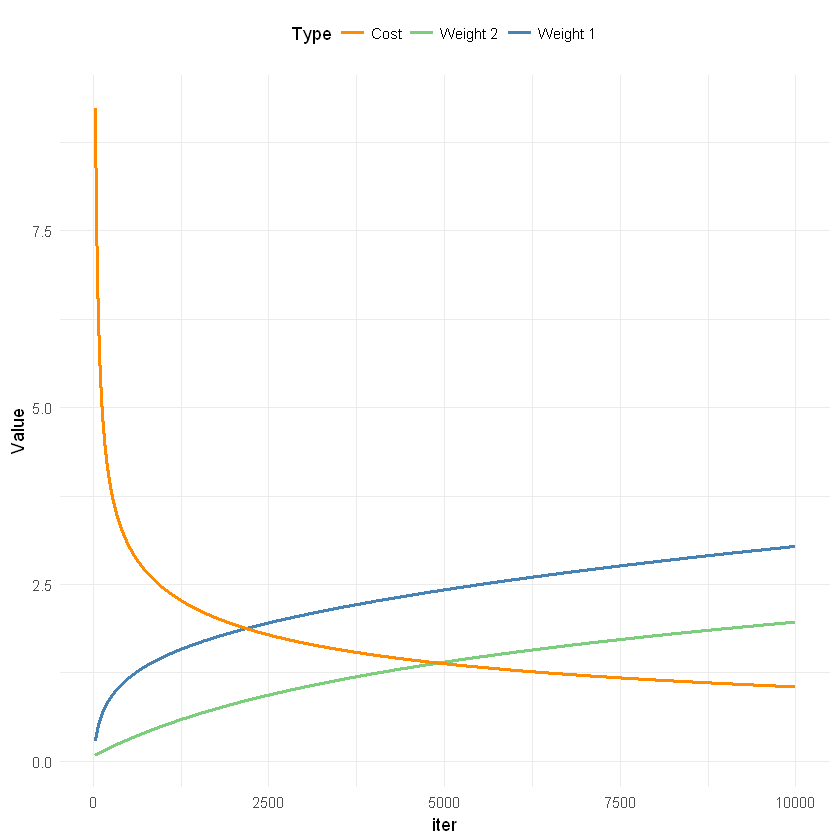

In [79]:
cost.df %>% filter(iter > 30) %>%
ggplot() + geom_line(aes(iter, w1, col = 'steelblue'), size = 1) + 
geom_line(aes(iter, w2, col = 'palegreen3'), size = 1) + 
 geom_line(aes(iter, cost, col = 'darkorange'), size = 1) + 
ylab("Value") + theme_minimal() + scale_colour_manual(name = 'Type', 
                      values =c('steelblue'='steelblue','palegreen3'='palegreen3', 'darkorange'='darkorange'), 
                                                      labels = c('Cost', 'Weight 2', 'Weight 1')) +
theme(legend.position = "top")

# 로지스틱 모델 해석

로지스틱 회귀 모델의 계수는 선형 회귀 모델의 계수가 하는 것과 유사한 방식으로 설명 변수와 반응 변수 간의 관계를 나타낸다. UCLA에서 제공하는 데이터를 사용해 로지스틱 모델을 만들어보자.

In [37]:
# Load library
library(caret)

# Load data
logit_data <- read.csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
str(logit_data)
head(logit_data)

'data.frame':	400 obs. of  4 variables:
 $ admit: int  0 1 1 1 0 1 1 0 1 0 ...
 $ gre  : int  380 660 800 640 520 760 560 400 540 700 ...
 $ gpa  : num  3.61 3.67 4 3.19 2.93 3 2.98 3.08 3.39 3.92 ...
 $ rank : int  3 3 1 4 4 2 1 2 3 2 ...


admit,gre,gpa,rank
0,380,3.61,3
1,660,3.67,3
1,800,4.00,1
1,640,3.19,4
0,520,2.93,4
1,760,3.00,2


지원자의 입학 여부(admit)을 시험 점수(gre, gpa)와 지원자의 학교 등급(rank)를 가지고 예측하는 모델을 만들면 아래와 같다.

In [40]:
# Preprocessing
logit_data$rank <- as.factor(logit_data$rank)
logit_data$admit <- as.factor(logit_data$admit)

# Split data
set.seed(1990)
train_idx <- createDataPartition(logit_data$admit, p = 0.7, list = F)
train <- logit_data[train_idx,]
test <- logit_data[-train_idx,]

# Train
logit.fit <- glm(admit ~ ., data = train, family = "binomial")
summary(logit.fit)


Call:
glm(formula = admit ~ ., family = "binomial", data = train)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
-1.623  -0.838  -0.634   1.071   2.185  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.116021   1.433398  -2.872 0.004085 ** 
gre          0.001259   0.001307   0.964 0.335290    
gpa          1.036299   0.414407   2.501 0.012396 *  
rank2       -0.756383   0.370062  -2.044 0.040960 *  
rank3       -1.626624   0.418658  -3.885 0.000102 ***
rank4       -1.400460   0.473847  -2.956 0.003122 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 350.90  on 280  degrees of freedom
Residual deviance: 318.53  on 275  degrees of freedom
AIC: 330.53

Number of Fisher Scoring iterations: 4


학습한 결과를 보면, gre 변수의 P-value가 0.335290으로 유의 수준보다 높아 통계적으로 유의미하지 않다.

로지스틱 회귀 모델에서 회귀 계수는 변수가 한 단위 증가할 때 log(Odds)의 변화량을 의미한다. gpa의 계수는 1.036299이다. gpa 점수가 1점 증가할 때 log(Odds)는 $\log{(\text{Odds})} = \log{\frac{p}{1-p}} = 1.036299$만큼 증가한다. 즉,

$$\ln{\frac{p}{1-p}} = 1.036299$$

$$\frac{p}{1-p} = \exp^{0.773778} = 2.8187$$

$$p = \frac{2.8187}{1 + 2.8187} = 0.7381$$
결국 gpa 점수가 1점 증가할 때 입학 확률(= p)가 0.7381배 증가한다.

범주형 변수인 rank의 경우에는 해석이 약간 달라진다. rank2의 계수 -0.756383은 rank1에서 rank2로 바뀌었을 때 log(Odds)의 변화량을 의미한다. 즉, rank1에 비해 rank2가 입학에 안 좋은 영향을 준다.

## Predict

In [43]:
# Predict
logit.proc <- predict(logit.fit, newdata = test, type = "response")
logit.pred <- ifelse(logit.proc >= 0.5, 1, 0)

# Create confusion matrix
confusionMatrix(logit.pred, test$admit, positive = "1", mode = "everything")

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 76 29
         1  5  9
                                          
               Accuracy : 0.7143          
                 95% CI : (0.6243, 0.7933)
    No Information Rate : 0.6807          
    P-Value [Acc > NIR] : 0.2477          
                                          
                  Kappa : 0.2104          
 Mcnemar's Test P-Value : 7.998e-05       
                                          
            Sensitivity : 0.23684         
            Specificity : 0.93827         
         Pos Pred Value : 0.64286         
         Neg Pred Value : 0.72381         
              Precision : 0.64286         
                 Recall : 0.23684         
                     F1 : 0.34615         
             Prevalence : 0.31933         
         Detection Rate : 0.07563         
   Detection Prevalence : 0.11765         
      Balanced Accuracy : 0.58756         
                                    

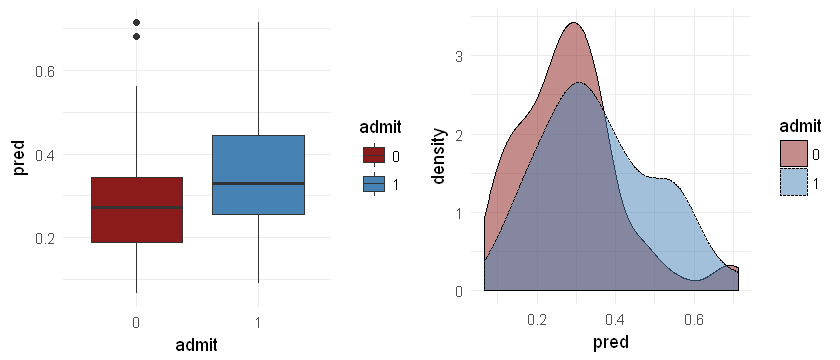

In [49]:
# Load library
library(gridExtra)

# Plot setting
options(repr.plot.width=7, repr.plot.height=3)

# Plot
p1 <- ggplot(data.frame(admit = test$admit, pred = logit.proc), aes(admit, pred, group = admit, fill = admit)) + 
  geom_boxplot() + scale_fill_manual(name = "admit", values = c("firebrick4", "steelblue")) + theme_minimal()

p2 <- ggplot(data.frame(admit = test$admit, pred = logit.proc), aes(pred, linetype = admit, fill = admit)) +
  geom_density(alpha = 0.5) + scale_fill_manual(name = "admit", values = c("firebrick4", "steelblue")) + theme_minimal()
grid.arrange(p1, p2, ncol = 2)

## ROC Curve

[1] 0.6494477

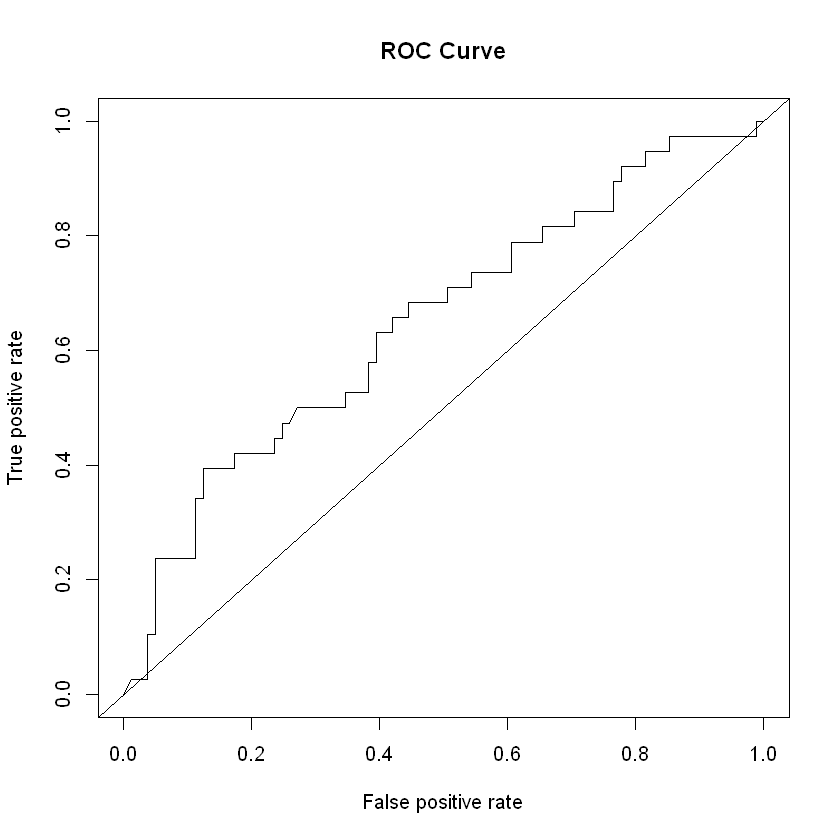

In [48]:
# Load library
library(ROCR)

# Plot setting
options(repr.plot.width=7, repr.plot.height=7)

# ROC Curve
pred <- prediction(logit.proc, test$admit)
perf <- performance(pred, measure = "tpr", x.measure = "fpr")
plot(perf, col = 'black', main = "ROC Curve")
abline(0, 1)

# AUC
performance(pred, "auc")@y.values[[1]]